# The python imaging library

The Python Imaging Library is used for image manipulation. It can be imported using:

In [1]:
import PIL

And details about its version can be seen using:

In [2]:
PIL.__version__

'10.0.1'

## Image Module

The core ```Image``` module is designed for fast access to data stored in a few basic pixel formats and is imported using:

In [3]:
from PIL import Image

Image data is essentially in the form of an ```NDarray```. A four pixel black and white numpy array can be created using a bool datatype:

In [4]:
import numpy as np

In [5]:
image_data = np.array([[0, 1],
                       [1, 0]], dtype=bool)

An instance of the ```Image``` class can be initialised using the function ```fromarray```:

In [6]:
image = Image.fromarray(image_data)

Note that the ```Image``` class is found in the ```Image``` module:

In [7]:
type(image)

PIL.Image.Image

This ```Image``` instance has the attributes ```width``` and ```height``` which correspond to the number of columns and number of rows respectively:

In [8]:
ncols = image.width
ncols

2

In [9]:
nrows = image.height
nrows

2

The tuple size which is effectively ```(ncols, nrows)```:

In [10]:
image.size

(2, 2)

The ```mode``` which is ```'1'``` meaning binary:

In [11]:
mode = image.mode
mode

'1'

And the image format, in this case which is ```None```:

In [12]:
fmt = image.format
fmt

The image can be shown using the ```show``` method, this will open up the image in the Oeprating Systems default image viewer hanging the OIPython Kernel until the default image viewer is closed. Note that most image viewers aren't cofigured to view an image with so few pixels:

The image can be saved using the ```save``` method:

In [13]:
image.save('binary.png')

In [14]:
image.save('binary.jpg')

Such an image can be opened in an image manipulation program like paint, which needs to be zoomed into maximum to view this image with so few pixels:

<img src='images/img_001.png' alt='img_001' width='450'/>

The image can be displayed using the ```pyplot``` function ```imshow```:

In [15]:
import matplotlib.pyplot as plt

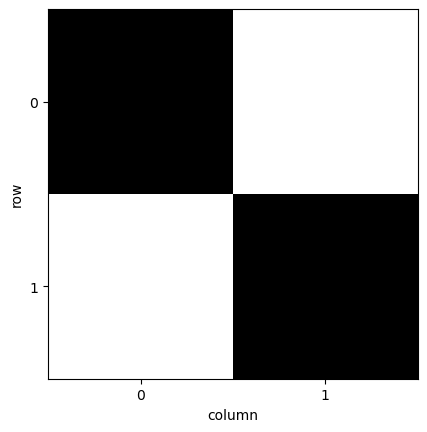

In [16]:
fig, ax = plt.subplots();
ax.imshow(image, cmap='gray', interpolation='none');
ax.set_xticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

A grayscale image typically uses an unsigned 8 bit integer datatype with values ranging from ```0:256``` where the minimum value ```0``` is black, the maximum value ```255``` is white and intermediate values are gray. Conceptualise each pixel on a computer screen as a white LED that has a brightness that scales to this 8 bit integer:

In [17]:
image_data = np.array([[  0,  85],
                       [170, 255]], dtype=np.uint8)

In [18]:
image = Image.fromarray(image_data)

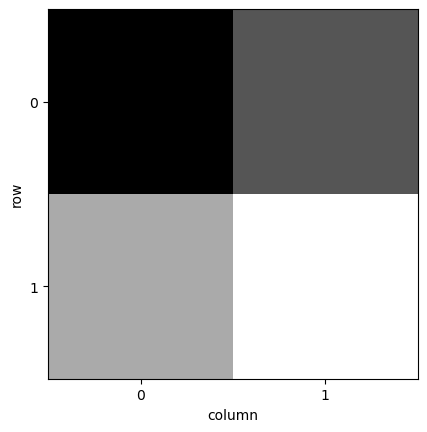

In [19]:
fig, ax = plt.subplots();
ax.imshow(image, cmap='gray', interpolation='none');
ax.set_xticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

The image attributes can be examined:

In [20]:
ncols = image.width
ncols

2

In [21]:
nrows = image.height
nrows

2

In [22]:
image.size

(2, 2)

In [23]:
image.mode

'L'

In [24]:
image.format

The main difference from the above is the mode which is ```'L'``` which is an abbreviation for the Luma transform which essentially means grayscale. This will be examined in more detail later after a color image has been examined.

The human eye has three color receptors that are short wavelength (blue) sensitive, medium wavelength (green) sensitive and long wavelength (red) sensitive. Each pixel in a computer screen is effectively a Red, Green, Blue (RGB) LED and each color channel has an independent 8 bit unsigned integer that controls the perspective LEDs brightness. The color for each pixel is therefore expressed using a 3 element ```tuple``` of the form ```(r, g, b)```:

In [25]:
image_data = np.array([[(  0,   0,   0), (255,   0,   0)],
                       [(  0, 255,   0), (   0,  0, 255)]], dtype=np.uint8)

In [26]:
image_data

array([[[  0,   0,   0],
        [255,   0,   0]],

       [[  0, 255,   0],
        [  0,   0, 255]]], dtype=uint8)

In [27]:
image = Image.fromarray(image_data)

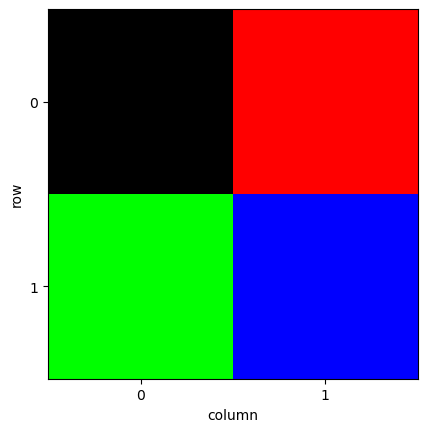

In [28]:
fig, ax = plt.subplots();
ax.imshow(image);
ax.set_xticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

The image attributes can be examined:

In [29]:
ncols = image.width
ncols

2

In [30]:
nrows = image.height
nrows

2

In [31]:
image.size

(2, 2)

In [32]:
image.mode

'RGB'

In [33]:
image.format

The main difference from the above is the mode which is ```'RGB'``` which is an abbreviation for Red, Blue and Green.

The above diagram shows the absense of color (black) and the three primary colors (red, green and blue). Physiologically our eyes measure light ratios at these wavelengths and our brain maps these ratios to a color. The three secondary colors are the result of mixing light of maximum intensity from two color channels cyan (green and blue), magenta (red and blue), yellow (red and green). If all three channels are at maximum intensity white (red, green and blue) is perceived:

In [34]:
image_data = np.array([[(  0,   0,   0), (255,   0,   0), (  0, 255,   0), (  0,   0, 255)],
                       [(  0, 255, 255), (255,   0, 255), (255, 255,   0), (255, 255, 255)]], dtype=np.uint8)

In [35]:
image_data

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0, 255]],

       [[  0, 255, 255],
        [255,   0, 255],
        [255, 255,   0],
        [255, 255, 255]]], dtype=uint8)

In [36]:
image = Image.fromarray(image_data)

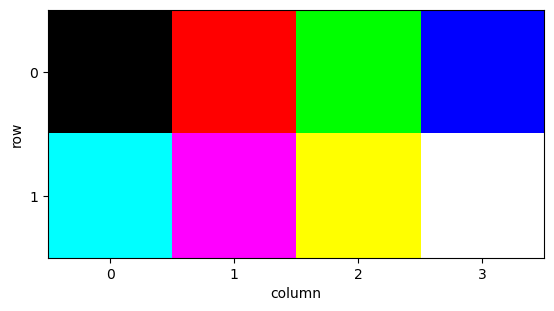

In [37]:
fig, ax = plt.subplots();
ax.imshow(image);
ax.set_xticks(np.arange(4), [str(i) for i in range(4)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

The image attributes can be examined:

In [38]:
ncols = image.width
ncols

4

In [39]:
nrows = image.height
nrows

2

In [40]:
image.size

(4, 2)

In [41]:
image.mode

'RGB'

In [42]:
image.format

If we return to the array ```image_data```:

In [43]:
image_data

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0, 255]],

       [[  0, 255, 255],
        [255,   0, 255],
        [255, 255,   0],
        [255, 255, 255]]], dtype=uint8)

Each color channel can be seperated by slicing:

In [44]:
reds = image_data[:, :, 0]
reds

array([[  0, 255,   0,   0],
       [  0, 255, 255, 255]], dtype=uint8)

In [45]:
greens = image_data[:, :, 1]
greens

array([[  0,   0, 255,   0],
       [255,   0, 255, 255]], dtype=uint8)

In [46]:
blues = image_data[:, :, 2]
blues

array([[  0,   0,   0, 255],
       [255, 255,   0, 255]], dtype=uint8)

A black and white image could be taken by summing a third of each channel i.e.

$$\frac{\text{reds}}{3} + \frac{\text{greens}}{3} + \frac{\text{blues}}{3}$$

However the Luma transform uses slightly different proportions to mimic our eyes has a slightly different sensitivity to each color channel:

$$\text{reds}\cdot\frac{299}{1000} + \text{greens}\cdot\frac{587}{1000} + \text{blues}\cdot\frac{114}{1000}$$

In [47]:
luma_grayscale = np.array(reds * (299 / 1000) + greens * (587 / 1000) + blues * (114 / 1000), dtype='uint8')

In [48]:
luma_grayscale

array([[  0,  76, 149,  29],
       [178, 105, 225, 255]], dtype=uint8)

In [49]:
image = Image.fromarray(luma_grayscale)

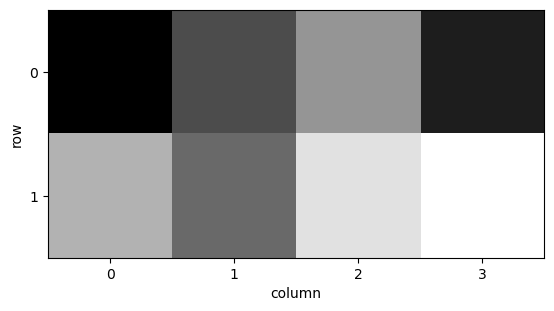

In [50]:
fig, ax = plt.subplots();
ax.imshow(image, cmap='gray');
ax.set_xticks(np.arange(4), [str(i) for i in range(4)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

Coloured images can be ```'RGB'``` or ```'RGBA'```, the fourth channel is the alpha channel which is the transparency of the color:

In [51]:
image_data = np.array([[(  0,   0,   0,  15), (255,   0,   0,  15), (  0, 255,   0,  15), (  0,   0, 255,  15)],
                       [(  0, 255, 255,  15), (255,   0, 255,  15), (255, 255,   0,  15), (255, 255, 255,  15)],
                       [(  0,   0,   0,  85), (255,   0,   0,  85), (  0, 255,   0,  85), (  0,   0, 255,  85)],
                       [(  0, 255, 255,  85), (255,   0, 255,  85), (255, 255,   0,  85), (255, 255, 255,  85)],
                       [(  0,   0,   0, 170), (255,   0,   0, 170), (  0, 255,   0, 170), (  0,   0, 255, 170)],
                       [(  0, 255, 255, 170), (255,   0, 255, 170), (255, 255,   0, 170), (255, 255, 255, 170)],
                       [(  0,   0,   0, 255), (255,   0,   0, 255), (  0, 255,   0, 255), (  0,   0, 255, 255)],
                       [(  0, 255, 255, 255), (255,   0, 255, 255), (255, 255,   0, 255), (255, 255, 255, 255)]], 
                      dtype=np.uint8)

In [52]:
image = Image.fromarray(image_data)

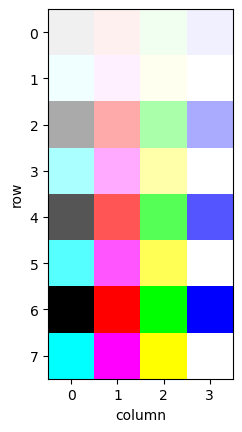

In [53]:
fig, ax = plt.subplots();
ax.imshow(image);
ax.set_xticks(np.arange(4), [str(i) for i in range(4)]);
ax.set_yticks(np.arange(8), [str(i) for i in range(8)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

Since each color uses an 8 bit channel, they are often expressed in hexadecimal form ```#rrggbbaa```, where ```rr```, ```gg```, ```bb``` and an optional ```aa``` are two hexadecimal characters corresponding to each channel. All the [CSS color names](https://matplotlib.org/stable/gallery/color/named_colors.html) are also recognised as strings.

## ImageColor Module

The ```ImageColor``` module contains a number of functions for converting a color to the desired format, i.e. a ```(r, g, b)``` tuple:

In [54]:
from PIL import ImageColor

The main function is ```getrgb```:

In [55]:
ImageColor.getrgb('royalblue')

(65, 105, 225)

In [56]:
ImageColor.getrgb('tomato')

(255, 99, 71)

In [57]:
ImageColor.getrgb('#ff0000')

(255, 0, 0)

In [58]:
ImageColor.getrgb('#ff0000ff')

(255, 0, 0, 255)

Unfortunately the function does not scale to an array of values:

In [59]:
image_data = np.array([['dimgray', 'tomato', 'springgreen', 'royalblue'],
                       ['turquoise', 'fuchsia', 'gold', 'snow']])

The ```.getcolor``` function is designed for a scalar and not broadcast across an ```ndarray```. Therefore it is easier to flatten the image:

In [60]:
dimensions = image_data.shape
dimensions

(2, 4)

In [61]:
image_data = image_data.flatten()

Perform a ```list comprehension```:

In [62]:
image_data = np.array([ImageColor.getrgb(pixel) for pixel in image_data], dtype='uint8')

In [63]:
image_data

array([[105, 105, 105],
       [255,  99,  71],
       [  0, 255, 127],
       [ 65, 105, 225],
       [ 64, 224, 208],
       [255,   0, 255],
       [255, 215,   0],
       [255, 250, 250]], dtype=uint8)

And then reshape:

In [64]:
image_data = image_data.reshape(dimensions + (3,))

In [65]:
image_data

array([[[105, 105, 105],
        [255,  99,  71],
        [  0, 255, 127],
        [ 65, 105, 225]],

       [[ 64, 224, 208],
        [255,   0, 255],
        [255, 215,   0],
        [255, 250, 250]]], dtype=uint8)

In [66]:
image = Image.fromarray(image_data)

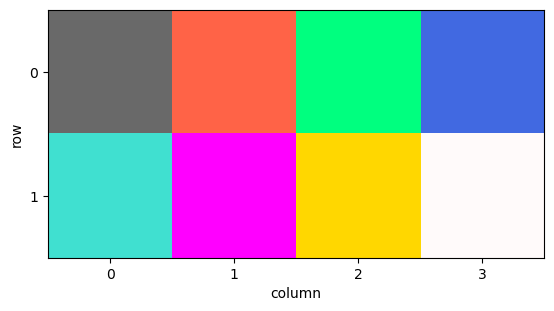

In [67]:
fig, ax = plt.subplots();
ax.imshow(image);
ax.set_xticks(np.arange(4), [str(i) for i in range(4)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

## ImageFilter Module

The ```ImageFilter``` module contains a filter classes:

In [68]:
from PIL import ImageFilter

If ```help``` is used on the module:

In [69]:
help(ImageFilter)

Help on module PIL.ImageFilter in PIL:

NAME
    PIL.ImageFilter

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # standard filters
    #
    # History:
    # 1995-11-27 fl   Created
    # 2002-06-08 fl   Added rank and mode filters
    # 2003-09-15 fl   Fixed rank calculation in rank filter; added expand call
    #
    # Copyright (c) 1997-2003 by Secret Labs AB.
    # Copyright (c) 1995-2002 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    builtins.object
        Filter
            ModeFilter
            MultibandFilter
                BoxBlur
                BuiltinFilter
                    BLUR
                    CONTOUR
                    DETAIL
                    EDGE_ENHANCE
                    EDGE_ENHANCE_MORE
                    EMBOSS
                    FIND_EDGES
                    Kernel
                    SHARPEN
                    SMOOTH
                    SMOOTH_MORE
          

The ```Filter``` class tree can be examined:

* Filter
    * ModeFilter
    * MultibandFilter
        * BoxBlur
        * BuiltinFilter
            * BLUR
            * CONTOUR
            * DETAIL
            * EDGE_ENHANCE
            * EDGE_ENHANCE_MORE
            * EMBOSS
            * FIND_EDGES
            * Kernel
            * SHARPEN
            * SMOOTH
            * SMOOTH_MORE
        * Color3DLUT
        * GaussianBlur
        * UnsharpMask
    * RankFilter
        * MaxFilter
        * MedianFilter
        * MinFilter

```Filter``` and ```MultibandFilter```, ```BuiltinFilter``` and ```RankFilter``` are all abstract classes used to group the other filters. The filter classes that are ```UPPER_SNAKE_CASE``` are constants and have no tunable parameters. The filters that are in ```PascalCase``` have tunable parameters and can be provided initialisation data for example ```GaussianBlur``` which has a named input argument ```radius```.

In [70]:
ImageFilter.GaussianBlur?

Init signature: ImageFilter.GaussianBlur(radius=2)
Docstring:     
Blurs the image with a sequence of extended box filters, which
approximates a Gaussian kernel. For details on accuracy see
<https://www.mia.uni-saarland.de/Publications/gwosdek-ssvm11.pdf>

:param radius: Standard deviation of the Gaussian kernel.
File:           c:\users\philip\miniconda3\envs\vscode\lib\site-packages\pil\imagefilter.py
Type:           type
Subclasses:     

The following data can be created:

In [71]:
image_data = 66 * np.ones(shape=(9, 9), dtype='uint8')
image_data[2:7, 2] = 15
image_data[2, 2:7] = 15
image_data[2:7, 6] = 15
image_data[6, 2:7] = 15

In [72]:
image_data

array([[66, 66, 66, 66, 66, 66, 66, 66, 66],
       [66, 66, 66, 66, 66, 66, 66, 66, 66],
       [66, 66, 15, 15, 15, 15, 15, 66, 66],
       [66, 66, 15, 66, 66, 66, 15, 66, 66],
       [66, 66, 15, 66, 66, 66, 15, 66, 66],
       [66, 66, 15, 66, 66, 66, 15, 66, 66],
       [66, 66, 15, 15, 15, 15, 15, 66, 66],
       [66, 66, 66, 66, 66, 66, 66, 66, 66],
       [66, 66, 66, 66, 66, 66, 66, 66, 66]], dtype=uint8)

In [73]:
image_original = Image.fromarray(image_data)

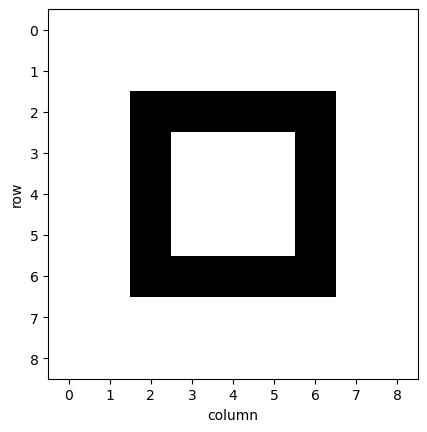

In [74]:
fig, ax = plt.subplots();
ax.imshow(image_original, cmap='gray', interpolation='none');
ax.set_xticks(np.arange(9), [str(i) for i in range(9)]);
ax.set_yticks(np.arange(9), [str(i) for i in range(9)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

The ```filter``` method of ```image``` can be used to apply a filter. Recall ```image``` is an instance of the ```Image``` class:

In [75]:
image_blurred = image_original.filter(filter=ImageFilter.BLUR)

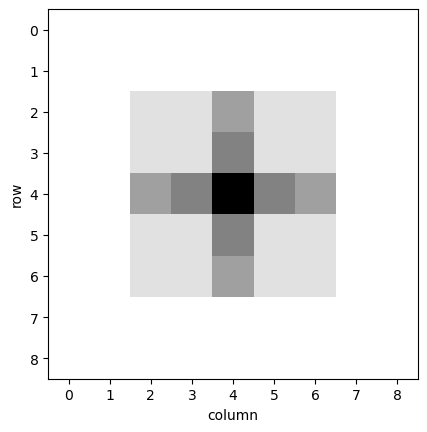

In [76]:
fig, ax = plt.subplots();
ax.imshow(image_blurred, cmap='gray', interpolation='none');
ax.set_xticks(np.arange(9), [str(i) for i in range(9)]);
ax.set_yticks(np.arange(9), [str(i) for i in range(9)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

This blurred image can be processed with a number of the other ```BuiltinFilter``` classes:

In [92]:
image_contour = image_blurred.filter(filter=ImageFilter.CONTOUR)
image_detail = image_blurred.filter(filter=ImageFilter.DETAIL)
image_edge_enhance = image_blurred.filter(filter=ImageFilter.EDGE_ENHANCE)
image_emboss = image_blurred.filter(filter=ImageFilter.EMBOSS)
image_find_edges = image_blurred.filter(filter=ImageFilter.FIND_EDGES)
image_sharpen = image_blurred.filter(filter=ImageFilter.SHARPEN)
image_smooth = image_blurred.filter(filter=ImageFilter.SMOOTH)

For convenience a ```plot_filter``` function will be defined:

In [93]:
def plot_filter(image, title):
    fig, ax = plt.subplots();
    ax.imshow(image, cmap='gray', interpolation='none');
    ax.set_xticks(np.arange(9), [str(i) for i in range(9)]);
    ax.set_yticks(np.arange(9), [str(i) for i in range(9)]);
    ax.set_xlabel('column');
    ax.set_ylabel('row');
    ax.set_title(title);

And these plots can be examined:

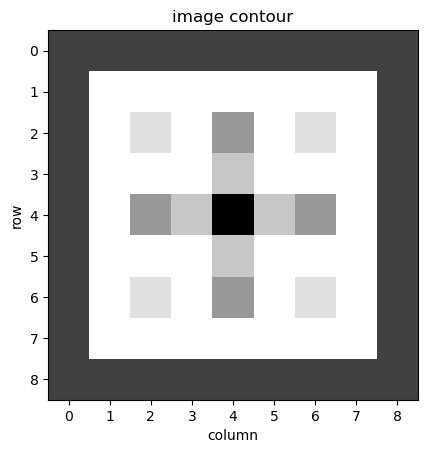

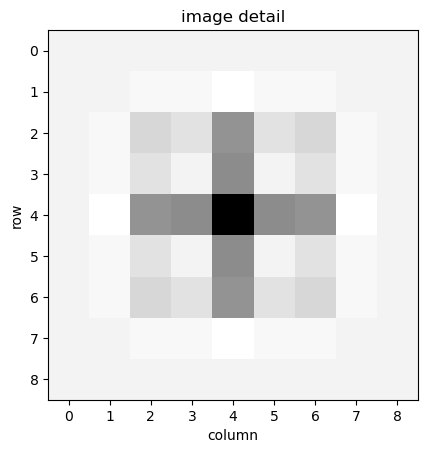

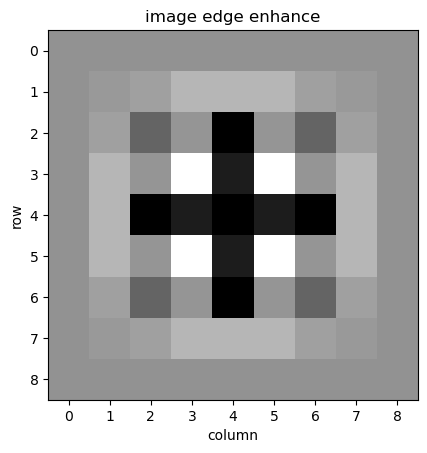

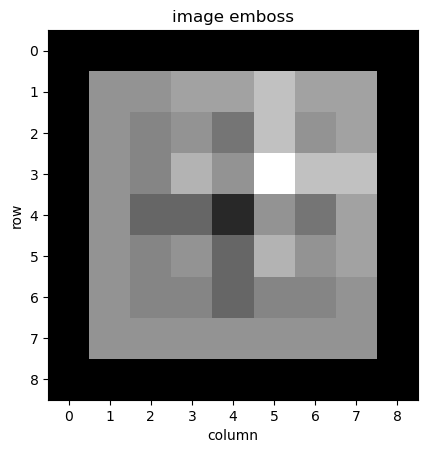

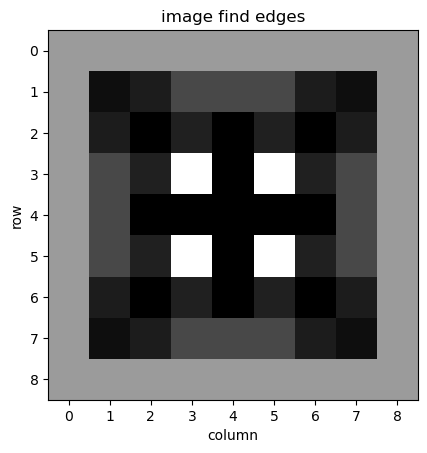

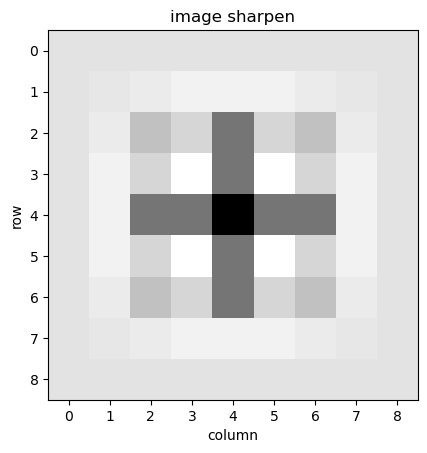

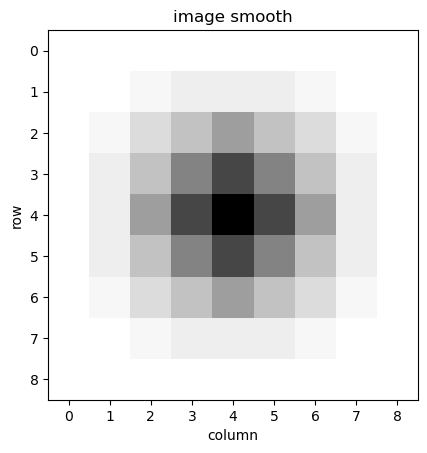

In [94]:
plot_filter(image=image_contour, title='image contour')
plot_filter(image=image_detail, title='image detail')
plot_filter(image=image_edge_enhance, title='image edge enhance')
plot_filter(image=image_emboss, title='image emboss')
plot_filter(image=image_find_edges, title='image find edges')
plot_filter(image=image_sharpen, title='image sharpen')
plot_filter(image=image_smooth, title='image smooth')

The effect of changing the radius when using the ```GaussianBlur``` filter can be seen: 

In [95]:
image_gaussian_blur_r1 = image_original.filter(filter=ImageFilter.GaussianBlur(radius=1))
image_gaussian_blur_r2 = image_original.filter(filter=ImageFilter.GaussianBlur(radius=2))
image_gaussian_blur_r3 = image_original.filter(filter=ImageFilter.GaussianBlur(radius=3))
image_gaussian_blur_r4 = image_original.filter(filter=ImageFilter.GaussianBlur(radius=4))

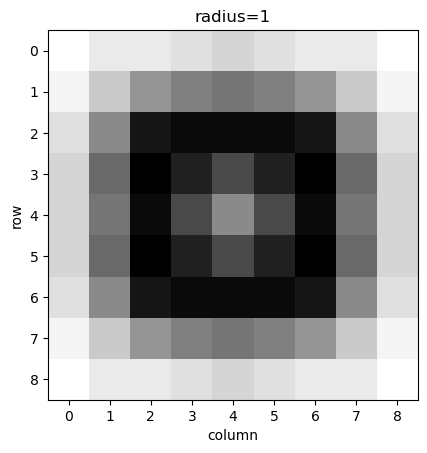

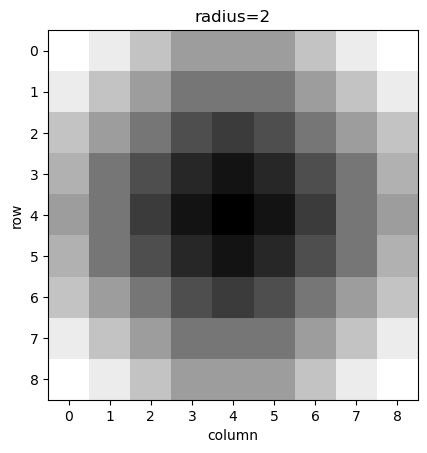

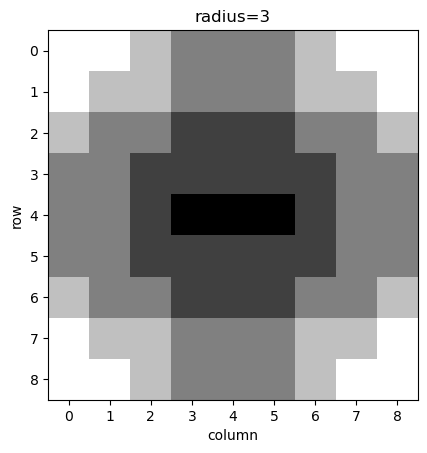

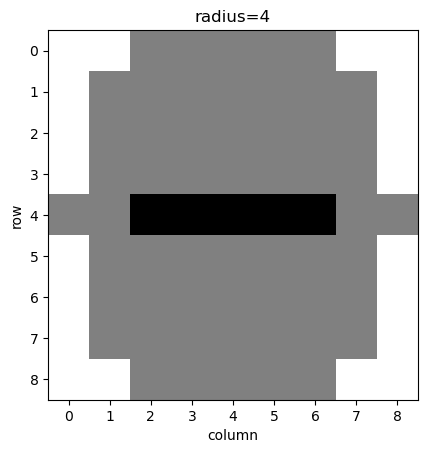

In [96]:
plot_filter(image=image_gaussian_blur_r1, title='radius=1')
plot_filter(image=image_gaussian_blur_r2, title='radius=2')
plot_filter(image=image_gaussian_blur_r3, title='radius=3')
plot_filter(image=image_gaussian_blur_r4, title='radius=4')

## ImageEnhance Module

The ```randint``` function from the ```numpy.randon``` module can be imported using:

In [175]:
import numpy.random as random

FOr reproducability the ```seed``` can e set to ```0```:

In [176]:
random.seed(0)

The ```image_data``` can be generated:

In [177]:
image_data = random.randint(low=0, high=256, size=(9, 9, 3), dtype='uint8')

An an ```Image``` instance ```image``` can be constructed:

In [178]:
image_original = Image.fromarray(image_data)

The ```plot_filter``` function can be updated for a color image:

In [194]:
def plot_filter(image, title):
    fig, ax = plt.subplots();
    ax.imshow(image);
    ax.set_xticks(np.arange(9), [str(i) for i in range(9)]);
    ax.set_yticks(np.arange(9), [str(i) for i in range(9)]);
    ax.set_xlabel('column');
    ax.set_ylabel('row');
    ax.set_title(title);

And the image can be examined:

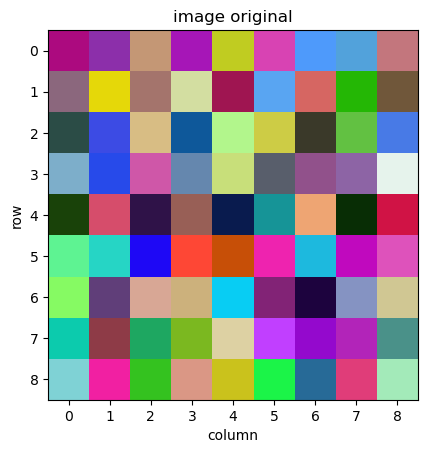

In [196]:
plot_filter(image_original, title='image original')

The ```ImageEnhance``` Module can be used to control an images sharpness and contrast:

In [104]:
from PIL import ImageEnhance

For example the ```Brightness``` can be controlled using:

In [197]:
brightness = ImageEnhance.Brightness(image_original)

In [198]:
image_brightness_00 = brightness.enhance(factor=0.0) # black image
image_brightness_05 = brightness.enhance(factor=0.5)
image_brightness_10 = brightness.enhance(factor=1.0) # original image
image_brightness_20 = brightness.enhance(factor=2.0)

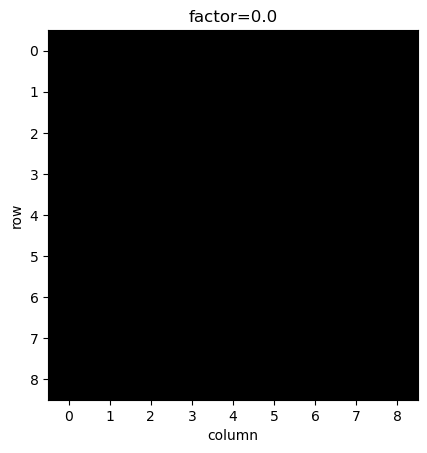

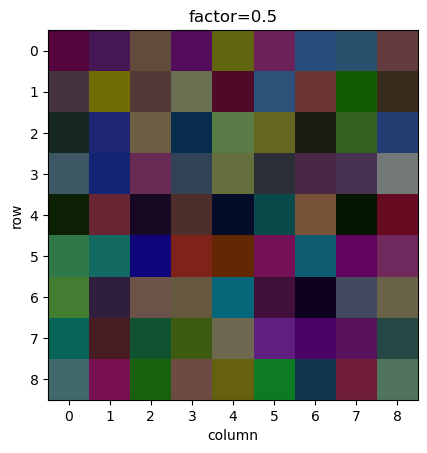

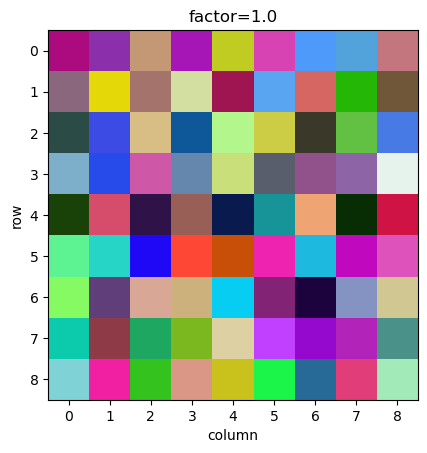

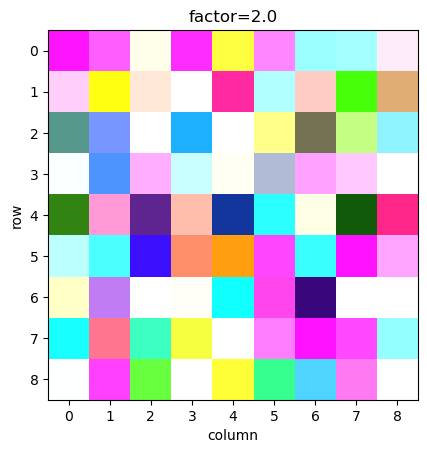

In [199]:
plot_filter(image=image_brightness_00, title='factor=0.0')
plot_filter(image=image_brightness_05, title='factor=0.5')
plot_filter(image=image_brightness_10, title='factor=1.0')
plot_filter(image=image_brightness_20, title='factor=2.0')

The ```Contrast``` can be changed using:

In [200]:
contrast = ImageEnhance.Contrast(image_original)

In [201]:
image_contrast_00 = contrast.enhance(factor=0.0) # solid grey image
image_contrast_05 = contrast.enhance(factor=0.5)
image_contrast_10 = contrast.enhance(factor=1.0) # original image
image_contrast_20 = contrast.enhance(factor=2.0)

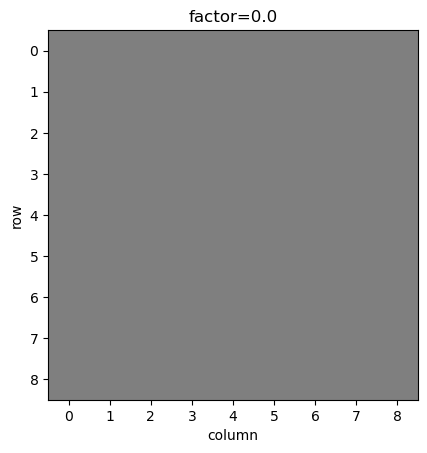

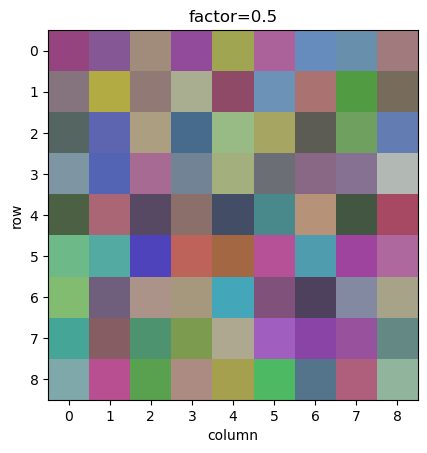

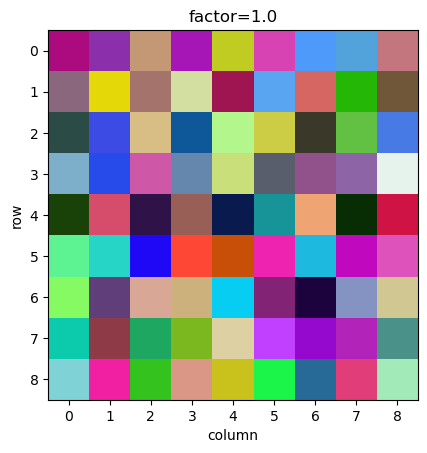

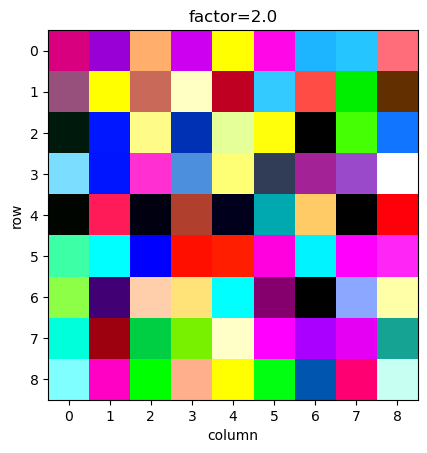

In [202]:
plot_filter(image=image_contrast_00, title='factor=0.0')
plot_filter(image=image_contrast_05, title='factor=0.5')
plot_filter(image=image_contrast_10, title='factor=1.0')
plot_filter(image=image_contrast_20, title='factor=2.0')

The ```Sharpness``` can be changed using:

In [203]:
sharpness = ImageEnhance.Sharpness(image_original)

In [204]:
image_sharpness_00 = sharpness.enhance(factor=0.0) # blurred image
image_sharpness_05 = sharpness.enhance(factor=0.5)
image_sharpness_10 = sharpness.enhance(factor=1.0) # original image
image_sharpness_20 = sharpness.enhance(factor=2.0) # sharpened image

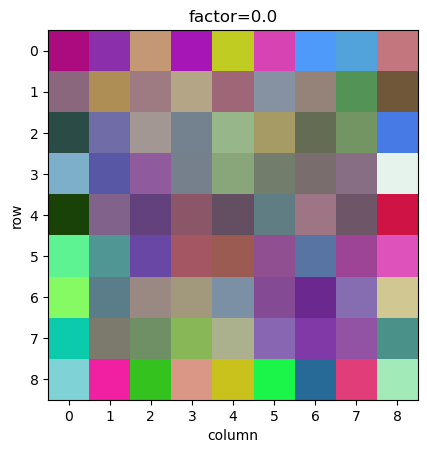

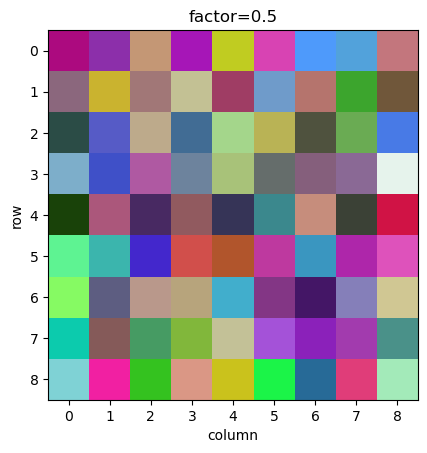

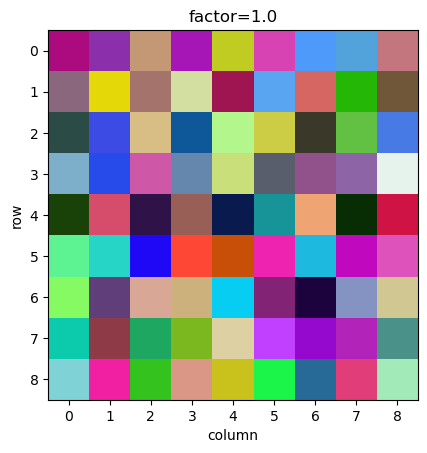

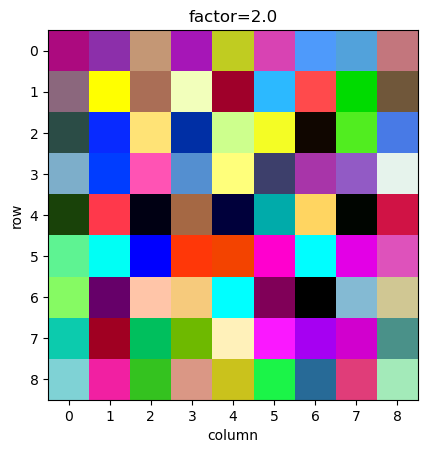

In [205]:
plot_filter(image=image_sharpness_00, title='factor=0.0')
plot_filter(image=image_sharpness_05, title='factor=0.5')
plot_filter(image=image_sharpness_10, title='factor=1.0')
plot_filter(image=image_sharpness_20, title='factor=2.0')

The ```Color``` can be changed using:

In [191]:
color = ImageEnhance.Color(image_original)

In [192]:
image_color_00 = color.enhance(factor=0.0) # black and white image
image_color_05 = color.enhance(factor=0.5)
image_color_10 = color.enhance(factor=1.0) # original image
image_color_20 = color.enhance(factor=2.0) 

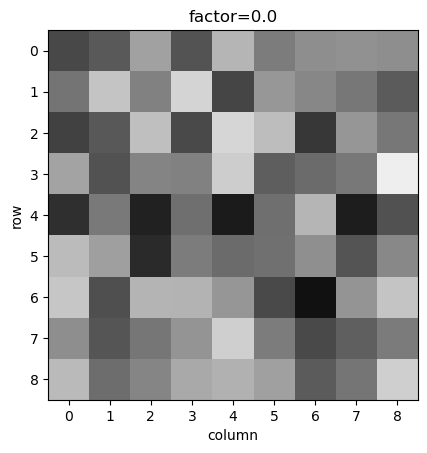

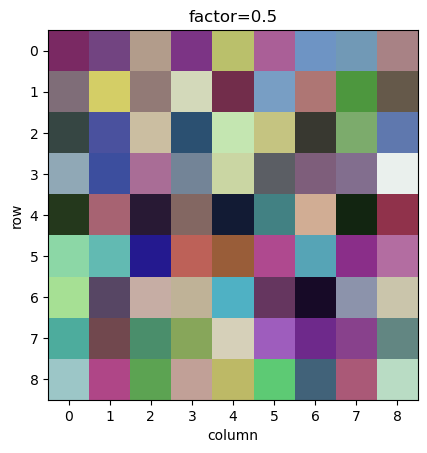

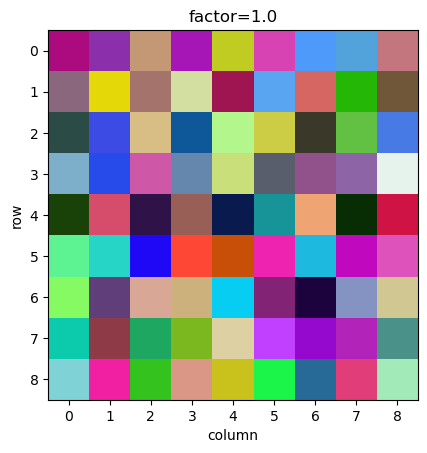

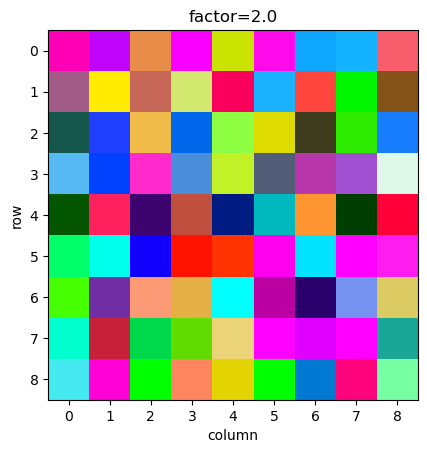

In [193]:
plot_filter(image=image_color_00, title='factor=0.0')
plot_filter(image=image_color_05, title='factor=0.5')
plot_filter(image=image_color_10, title='factor=1.0')
plot_filter(image=image_color_20, title='factor=2.0')

## ImageTransform Module

In [206]:
from PIL import ImageTransform

In [209]:
help(ImageTransform)

Help on module PIL.ImageTransform in PIL:

NAME
    PIL.ImageTransform

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # transform wrappers
    #
    # History:
    # 2002-04-08 fl   Created
    #
    # Copyright (c) 2002 by Secret Labs AB
    # Copyright (c) 2002 by Fredrik Lundh
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    PIL.Image.ImageTransformHandler(builtins.object)
        Transform
            AffineTransform
            ExtentTransform
            MeshTransform
            QuadTransform
    
    class AffineTransform(Transform)
     |  AffineTransform(data)
     |  
     |  Define an affine image transform.
     |  
     |  This function takes a 6-tuple (a, b, c, d, e, f) which contain the first
     |  two rows from an affine transform matrix. For each pixel (x, y) in the
     |  output image, the new value is taken from a position (a x + b y + c,
     |  d x + e y + f) in the input image, rounded to near

In [ ]:
ImageEnhance.Contrast?

Init signature: ImageEnhance.Contrast(image)
Docstring:     
Adjust image contrast.

This class can be used to control the contrast of an image, similar
to the contrast control on a TV set. An enhancement factor of 0.0
gives a solid grey image. A factor of 1.0 gives the original image.
File:           c:\users\philip\miniconda3\envs\vscode\lib\site-packages\pil\imageenhance.py
Type:           type
Subclasses:     

## ImageDraw Module

In [82]:
from PIL import ImageMath, ImagePalette, ImageChops, ImageSequence, ImageDraw, ImageDraw2

In [83]:
from PIL import ImageGrab, ImageShow

In [84]:
help(ImageGrab)

Help on module PIL.ImageGrab in PIL:

NAME
    PIL.ImageGrab

DESCRIPTION
    # The Python Imaging Library
    # $Id$
    #
    # screen grabber
    #
    # History:
    # 2001-04-26 fl  created
    # 2001-09-17 fl  use builtin driver, if present
    # 2002-11-19 fl  added grabclipboard support
    #
    # Copyright (c) 2001-2002 by Secret Labs AB
    # Copyright (c) 2001-2002 by Fredrik Lundh
    #
    # See the README file for information on usage and redistribution.
    #

FUNCTIONS
    grab(bbox=None, include_layered_windows=False, all_screens=False, xdisplay=None)
    
    grabclipboard()

FILE
    c:\users\philip\miniconda3\envs\vscode\lib\site-packages\pil\imagegrab.py




ImageMath

## ImageGrab Module

The ```ImageGrab``` module has two functions, ```grab``` which takes a screenshot:

In [85]:
image = ImageGrab.grab()

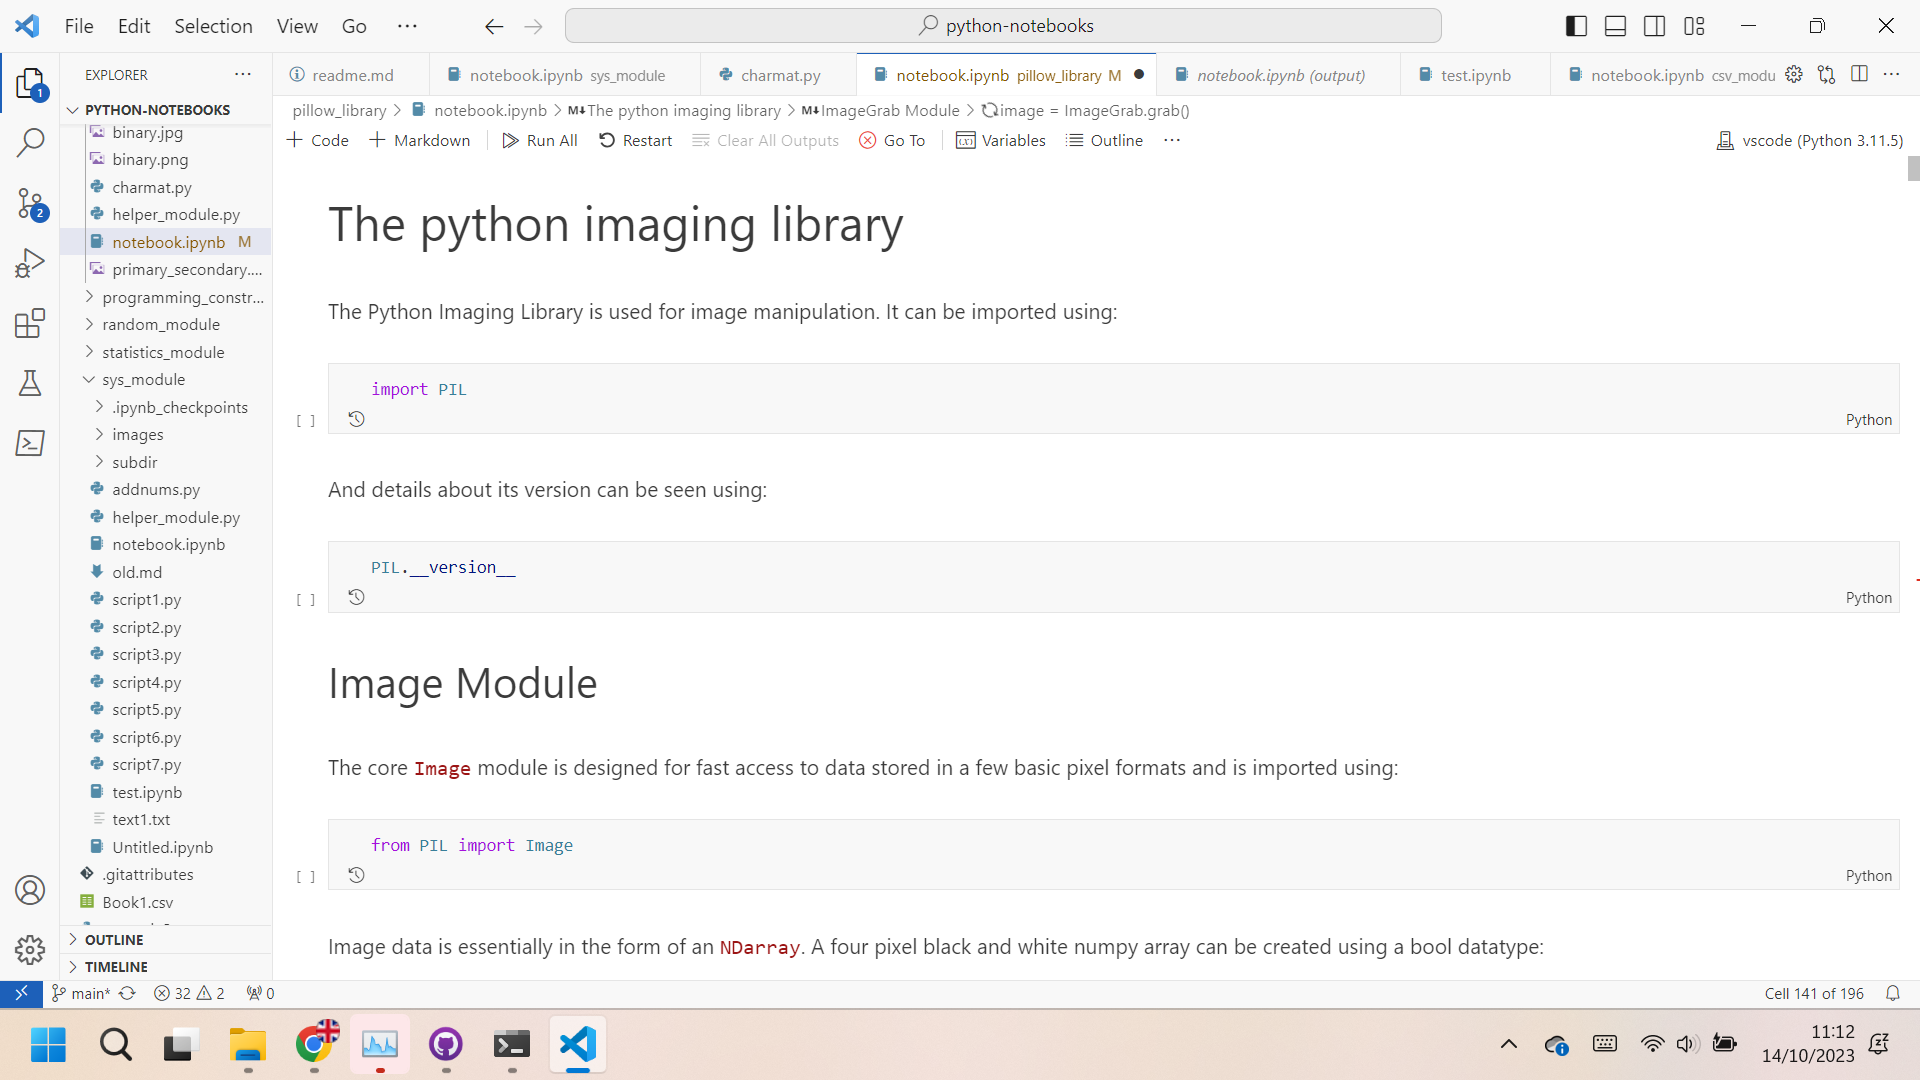

In [86]:
image

In [87]:
image.size

(1920, 1080)

In [88]:
image.mode

'RGB'

In [89]:
image.format

And ```grabclipboard``` which is configured to read an image from the clipboard. Unfortunatelythe ```grabclipboard``` function is configured for an older version of Windows and expects an image that is ```RGB``` instead of the supplied ```RGBA``` and gives a ```KeyError``` [GitHub issue 7464](https://github.com/python-pillow/Pillow/issues/7464)

## Loading in an Image

In [ ]:
img = Image.open(r'.\image_files\img_001.jpg')

In [ ]:
img

In [ ]:
img.width

In [ ]:
img.height

In [ ]:
img.size

In [ ]:
img.mode

In [ ]:
img.format

img

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the 5x5 pattern
pattern = np.array([[0, 1, 0, 1, 0],
                    [1, 0, 1, 0, 1],
                    [0, 1, 0, 1, 0],
                    [1, 0, 1, 0, 1],
                    [0, 1, 0, 1, 0]], dtype=np.uint8) * 255  # 0 for black, 1 for white

# Create a Pillow image from the data
image = Image.fromarray(pattern)

# Plot the image using Matplotlib
plt.imshow(image, cmap='gray', interpolation='none')

# Set row and column labels as integers
plt.xticks(np.arange(5), [str(i) for i in range(5)])
plt.yticks(np.arange(5), [str(i) for i in range(5)])

# Add row and column numbers
for i in range(5):
    for j in range(5):
        plt.text(j, i, f'({i}, {j})', ha='center', va='center', color='red')

# Set labels and show the plot
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('5x5 Monochrome Image with Row and Column Numbers')
plt.show()


In [ ]:
import numpy as np
from PIL import ImageColor

# Define the function to convert a hexadecimal string to an RGB tuple with correct format
def hex_to_rgb_corrected(hex_color):
    rgb_tuple = ImageColor.getcolor(hex_color, "RGB")
    return tuple(reversed(rgb_tuple))[:3]  # Correct the format and extract only the RGB values

# Array of hexadecimal color values (2D)
hex_colors = np.array([['#000000', '#ff0000', '#00ff00', '#0000ff'],
                       ['#00ffff', '#ff00ff', '#ffff00', '#ffff00']])

# Use np.vectorize to apply the conversion function element-wise to the array
np.vectorize(hex_to_rgb_corrected, otypes=[np.uint8, np.uint8, np.uint8])(hex_colors)





In [ ]:
def show_character(pattern):
    image = Image.fromarray(pattern)

    fig, ax = plt.subplots();
    ax.imshow(image, cmap='gray', interpolation='none');

    ax.set_xticks(np.arange(5), [str(i) for i in range(5)]);
    ax.set_yticks(np.arange(5), [str(i) for i in range(5)]);

    for i in range(5):
        for j in range(5):
            ax.text(j, i, f'({i}, {j})', ha='center', va='center', color='red');

    # Set labels and show the plot
    ax.set_xlabel('Column');
    ax.set_ylabel('Row');
    ax.set_title('5x5 Monochrome Image with Row and Column Numbers');


In [ ]:
from charmat import character_matrix, character_matrix_inverted

In [ ]:
show_character(character_matrix['A'])

In [ ]:
show_character(character_matrix_inverted['A'])

In [ ]:
show_character(character_matrix_inverted['B'])

In [ ]:
show_character(character_matrix_inverted['C'])

In [ ]:
def show_text(line='HELLO WORLD!'):
    from charmat import character_matrix_inverted
    fig, ax = plt.subplots(nrows=1, ncols=16);

    if len(line) == 16:
        pass
    elif len(line) < 16:
        line = line.ljust(16)
    else:
        line = line[:16]

    for idx, letter in enumerate(line):
        pattern = character_matrix_inverted[letter]
        image = Image.fromarray(pattern)
        ax[idx].imshow(image, cmap='gray', interpolation='none');
        ax[idx].axis('off');
    

In [ ]:
show_text()

In [ ]:
show_text('BYE WORLD!')

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Create a new image with RGB color mode and size 2x2 pixels
image = Image.new('RGB', (2, 2))

# Set individual pixel colors
pixel_colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]  # k, r, g, b

# Assign the colors to the pixels
image.putpixel((0, 0), pixel_colors[0])  # Black
image.putpixel((1, 0), pixel_colors[1])  # Red
image.putpixel((0, 1), pixel_colors[2])  # Green
image.putpixel((1, 1), pixel_colors[3])  # Blue

# Convert the image to a NumPy array
image_np = np.array(image)

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Plot the color image
ax.imshow(image_np)
ax.set_title('Color Image')
ax.set_xticks(range(image_np.shape[1]))
ax.set_yticks(range(image_np.shape[0]))
ax.set_xticklabels(range(image_np.shape[1]))
ax.set_yticklabels(range(image_np.shape[0]))
ax.set_xlabel('X (Pixel Column)')
ax.set_ylabel('Y (Pixel Row)')

plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Create a new image with RGB color mode and size 2x4 pixels
image = Image.new('RGB', (4, 2))

# Set individual pixel colors in the new order k, r, g, b, c, y, m, w
pixel_colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255),
                (0, 255, 255), (255, 255, 0), (255, 0, 255),
                (255, 255, 255)]  # k, r, g, b, c, y, m, w

for i in range(2):
    for j in range(4):
        image.putpixel((j, i), pixel_colors[i*4 + j])

# Convert the image to a NumPy array
image_np = np.array(image)

# Split the image into color channels
red_channel = image_np[:,:,0]
green_channel = image_np[:,:,1]
blue_channel = image_np[:,:,2]

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Plot each color channel
axs[0, 0].imshow(red_channel, cmap='Reds')
axs[0, 0].set_title('Red Channel')
axs[0, 0].set_xticks(range(red_channel.shape[1]))
axs[0, 0].set_yticks(range(red_channel.shape[0]))
axs[0, 0].set_xticklabels(range(red_channel.shape[1]))
axs[0, 0].set_yticklabels(range(red_channel.shape[0]))
axs[0, 0].set_xlabel('X (Pixel Column)')
axs[0, 0].set_ylabel('Y (Pixel Row)')

axs[0, 1].imshow(green_channel, cmap='Greens')
axs[0, 1].set_title('Green Channel')
axs[0, 1].set_xticks(range(green_channel.shape[1]))
axs[0, 1].set_yticks(range(green_channel.shape[0]))
axs[0, 1].set_xticklabels(range(green_channel.shape[1]))
axs[0, 1].set_yticklabels(range(green_channel.shape[0]))
axs[0, 1].set_xlabel('X (Pixel Column)')
axs[0, 1].set_ylabel('Y (Pixel Row)')

axs[1, 0].imshow(blue_channel, cmap='Blues')
axs[1, 0].set_title('Blue Channel')
axs[1, 0].set_xticks(range(blue_channel.shape[1]))
axs[1, 0].set_yticks(range(blue_channel.shape[0]))
axs[1, 0].set_xticklabels(range(blue_channel.shape[1]))
axs[1, 0].set_yticklabels(range(blue_channel.shape[0]))
axs[1, 0].set_xlabel('X (Pixel Column)')
axs[1, 0].set_ylabel('Y (Pixel Row)')

# Plot the color image
axs[1, 1].imshow(image_np)
axs[1, 1].set_title('Color Image')
axs[1, 1].set_xticks(range(image_np.shape[1]))
axs[1, 1].set_yticks(range(image_np.shape[0]))
axs[1, 1].set_xticklabels(range(image_np.shape[1]))
axs[1, 1].set_yticklabels(range(image_np.shape[0]))
axs[1, 1].set_xlabel('X (Pixel Column)')
axs[1, 1].set_ylabel('Y (Pixel Row)')

plt.tight_layout()
plt.show()

In [ ]:
NROWS = 100
NCOLS = 200
NCOLORS = 3

image_data = np.zeros((NROWS, NCOLS, NCOLORS))

In [ ]:
fig, ax = plt.subplots();
ax.imshow(image_data);
ax.set_xlabel('column');
ax.set_ylabel('row');

In [ ]:
NROWS = 100
NCOLS = 200
NCOLORS = 3

image_data = np.zeros((NROWS, NCOLS, NCOLORS))

In [ ]:
ROWS = slice(0, 50)
COLS = slice(0, 25)
RED = 0
GREEN = 1
BLUE = 2

In [ ]:
image_data[ROWS, COLS]